In [35]:
import rasterio as rs

In [36]:
!cp ./data/hrap_grid_stere.tiff ./data/hrap_grid_stere_idx.tiff

In [37]:
fl = './data/hrap_grid_stere_idx.tiff'
with rs.open(fl,'r') as srs:
    rast = srs.read(1)
    profile = srs.profile

In [38]:
# generate the index raster
k,l = rast.shape
idx = np.arange(1,(k*l)+1,dtype=np.float64)
idx.shape =(k,l)

In [39]:
# update the profile
profile['nodata'] = -9999

In [40]:
with rs.open(fl,'r+',**profile) as dst:
    dst.write(idx,1)

/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


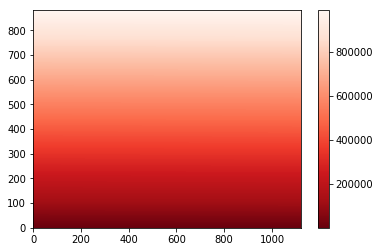

In [41]:
plt.pcolormesh(idx,cmap='Reds_r')
plt.colorbar()

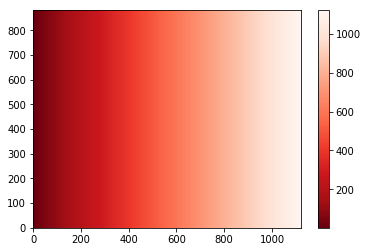

In [13]:
plt.pcolormesh(rast,cmap='Reds_r')
plt.colorbar()

In [ ]:
# iterate through the cells
for i in range(k):
    for o in range(l):
        